# Data 

In [32]:
# Import necessary libraries
import requests  # Used for making HTTP requests
import pandas as pd  # Essential data analysis library

# Define constants
API_KEY = 'ed5aeebe-3bd2-4a32-b00d-de83a9cf113d'  # API key for accessing DMI

# URLs for each parameter and for each time period
PARAMETERS = {
    'mean_temp': {
        '2018-2023': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=2018-02-12T00%3A00%3A00Z%2F..&parameterId=mean_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
        'before-2018': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=..%2F2018-03-18T12%3A31%3A12Z&parameterId=mean_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84'
    },
    'mean_daily_max_temp': {
        '2018-2023': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=2018-02-12T00%3A00%3A00Z%2F..&parameterId=mean_daily_max_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
        'before-2018': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=..%2F2018-03-18T12%3A31%3A12Z&parameterId=mean_daily_max_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84'
    },
    'mean_daily_min_temp': {
        '2018-2023': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=2018-02-12T00%3A00%3A00Z%2F..&parameterId=mean_daily_min_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
        'before-2018': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=..%2F2018-03-18T12%3A31%3A12Z&parameterId=mean_daily_min_temp&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84'
    },
    'mean_wind_speed': {
        '2018-2023': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=2018-02-12T00%3A00%3A00Z%2F..&parameterId=mean_wind_speed&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
        'before-2018': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=..%2F2018-03-18T12%3A31%3A12Z&parameterId=mean_wind_speed&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84'
    },
    'acc_precip': {
       '2018-2023': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=2018-02-12T00%3A00%3A00Z%2F..&parameterId=acc_precip&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84',
        'before-2018': 'https://dmigw.govcloud.dk/v2/climateData/collections/countryValue/items?datetime=..%2F2018-03-18T12%3A31%3A12Z&parameterId=acc_precip&timeResolution=month&bbox-crs=https%3A%2F%2Fwww.opengis.net%2Fdef%2Fcrs%2FOGC%2F1.3%2FCRS84'
    }
}

# Parameters common to all requests
params = {
    'api-key': API_KEY  # Authentication parameter
}

def fetch_and_process_data(url, params):
    """
    Fetches the climate data from the specified URL and processes it into a pandas DataFrame.
    
    Parameters:
        - url (str): The API endpoint URL.
        - params (dict): Dictionary containing request parameters.
        
    Returns:
        - pd.DataFrame: A dataframe containing the fetched and processed climate data.
    """
    
    # Send GET request to the specified DMI URL with the given parameters
    response = requests.get(url, params=params)

    # If the request was not successful, raise an exception
    response.raise_for_status()

    # Parse the JSON response
    json_data = response.json()

    # Convert the JSON object to a DataFrame and filter relevant columns
    df = pd.json_normalize(json_data['features'])
    df = df[["properties.from", "properties.value"]]

    # Extract the date part (up to the 'T') from the "properties.from" column for better readability
    df['properties.from'] = df['properties.from'].str[:10]

    return df

# Fetch and process data for each parameter and for each time period
dfs = {}  # To store dataframes for each parameter

for parameter, urls in PARAMETERS.items():
    df_2018_2023 = fetch_and_process_data(urls['2018-2023'], params)
    df_before_2018 = fetch_and_process_data(urls['before-2018'], params)
    
    # Combine/merge the DataFrames for this parameter
    dfs[parameter] = pd.concat([df_2018_2023, df_before_2018], ignore_index=True)
    


In [33]:
# This will store our main DataFrame with all parameters combined
df_combined_all_parameters = None

for parameter, urls in PARAMETERS.items():
    df_2018_2023 = fetch_and_process_data(urls['2018-2023'], params)
    df_before_2018 = fetch_and_process_data(urls['before-2018'], params)
    
    # Concatenate both DataFrames vertically
    df_parameter = pd.concat([df_2018_2023, df_before_2018], ignore_index=True)
    
    # Rename the value column to the respective parameter name for clarity
    df_parameter.rename(columns={'properties.value': parameter}, inplace=True)

    # If our main DataFrame is still empty, initialize it with the current parameter DataFrame
    if df_combined_all_parameters is None:
        df_combined_all_parameters = df_parameter
    else:
        # Else, merge the current parameter DataFrame with the main DataFrame on 'properties.from' (date)
        df_combined_all_parameters = pd.merge(df_combined_all_parameters, df_parameter, on='properties.from', how='outer')

# Sort the combined dataframe by date
df_combined_all_parameters = df_combined_all_parameters.sort_values(by='properties.from')

# Reset the index
df_combined_all_parameters = df_combined_all_parameters.reset_index(drop=True)

# At this point, df_combined_all_parameters will have all the parameters in separate columns with 'properties.from' as the date reference
df_combined_all_parameters


,properties.from,mean_temp,mean_daily_max_temp,mean_daily_min_temp,mean_wind_speed,acc_precip
0,2011-01-01,0.3,2.6,NaN,4.2,47.8
1,2011-02-01,-0.1,1.6,NaN,6.5,39.9
2,2011-03-01,3.0,NaN,NaN,5.1,29.9
3,2011-04-01,9.9,NaN,NaN,4.7,17.4
4,2011-05-01,11.3,NaN,NaN,4.9,54.4
...,...,...,...,...,...,...
178,2023-04-01,7.0,11.2,2.9,4.5,43.8
179,2023-05-01,11.2,16.0,6.4,4.6,14.1
180,2023-06-01,16.4,21.9,10.7,3.6,27.0
181,2023-07-01,15.9,19.9,11.9,4.7,140.8


In [34]:
# Rename the columns for visual clarity
df_combined_all_parameters.rename(columns={
    "properties.from": "month",
    "mean_temp": "mean temp",
    "mean_daily_max_temp": "mean daily max temp",
    "mean_daily_min_temp": "mean daily min temp",
    "mean_wind_speed": "mean wind speed",
    "acc_precip": "accumulated precipitation"
}, inplace=True)

# Modify the entries in the "month" column to remove the "-01"
df_combined_all_parameters['month'] = df_combined_all_parameters['month'].str[:-3]

# Save the cleaned dataframe to a CSV file
df_combined_all_parameters.to_csv('Weather_data.csv', index=False)
print("Data saved to 'Weather_data.csv'")

Data saved to 'Weather_data.csv'


In [35]:
# Check for duplicates across all columns
duplicates = df_combined_all_parameters[df_combined_all_parameters.duplicated(keep=False)]
if not duplicates.empty:
    print(f"{len(duplicates)} duplicates found:")
    print(duplicates)
    
    # Remove the duplicates
    df_combined_all_parameters.drop_duplicates(keep='first', inplace=True)
    
    # Reset the index
    df_combined_all_parameters.reset_index(drop=True, inplace=True)
    print("\nDuplicates removed and index reset!")
else:
    print("No duplicates found.")


32 duplicates found:
       month  mean temp  mean daily max temp  mean daily min temp  \
86   2018-03        0.3                  2.6                 -1.9   
87   2018-03        0.3                  2.6                 -1.9   
88   2018-03        0.3                  2.6                 -1.9   
89   2018-03        0.3                  2.6                 -1.9   
90   2018-03        0.3                  2.6                 -1.9   
91   2018-03        0.3                  2.6                 -1.9   
92   2018-03        0.3                  2.6                 -1.9   
93   2018-03        0.3                  2.6                 -1.9   
94   2018-03        0.3                  2.6                 -1.9   
95   2018-03        0.3                  2.6                 -1.9   
96   2018-03        0.3                  2.6                 -1.9   
97   2018-03        0.3                  2.6                 -1.9   
98   2018-03        0.3                  2.6                 -1.9   
99   2018-03 

In [36]:
# Create a mask where True denotes rows without NaN values
mask_no_nan = df_combined_all_parameters.notna().all(axis=1)

# Find streaks of True values
streak_data = (mask_no_nan != mask_no_nan.shift()).cumsum()
streak_counts = streak_data[mask_no_nan].value_counts()

# Get the streak number of the longest streak
longest_streak_number = streak_counts.idxmax()

# Fetch indices of the longest streak
indices_of_longest_streak = streak_data[streak_data == longest_streak_number].index

# Fetch starting and ending month of the longest streak
start_month = df_combined_all_parameters.loc[indices_of_longest_streak[0], 'month']
end_month = df_combined_all_parameters.loc[indices_of_longest_streak[-1], 'month']

print(f"The longest streak of months without NaN entries is: {len(indices_of_longest_streak)} months.")
print(f"It started in {start_month} and ended in {end_month}.")


The longest streak of months without NaN entries is: 68 months.
It started in 2018-01 and ended in 2023-08.


In [37]:
# List of weather parameters for which we want to compute anomalies
columns_to_compute = [
    "mean temp", 
    "mean daily max temp", 
    "mean daily min temp", 
    "mean wind speed", 
    "accumulated precipitation"
]

# Compute the average for each parameter for each month across all years
monthly_avg = df_combined_all_parameters.groupby(df_combined_all_parameters['month'].str[-2:]).mean()[columns_to_compute]

def compute_anomaly(row, col_name):
    """
    Computes the anomaly for a given row and column.
    
    Parameters:
        - row (pd.Series): A row of the dataframe.
        - col_name (str): The column name for which we want to compute the anomaly.
        
    Returns:
        - float: The computed anomaly for the given row's month and column, rounded to one decimal place.
    """
    month = row['month'][-2:]  # Extract month from the yyyy-mm format
    return round(row[col_name] - monthly_avg.at[month, col_name], 1)

# Calculate the anomaly for each column in the dataframe
for col in columns_to_compute:
    anomaly_col_name = col + ' anomaly'
    df_combined_all_parameters[anomaly_col_name] = df_combined_all_parameters.apply(lambda row: compute_anomaly(row, col), axis=1)

# Print the updated dataframe
df_combined_all_parameters



,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp anomaly,mean daily max temp anomaly,mean daily min temp anomaly,mean wind speed anomaly,accumulated precipitation anomaly
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4
150,2023-07,15.9,19.9,11.9,4.7,140.8,-0.8,-1.3,-0.6,0.5,67.2


In [38]:
# To ensure a backup of the cleaned data, we'll save the DataFrame into a CSV format. 
# This creates a persistent copy of the weather data that's been cleaned and processed.

df_combined_all_parameters.to_csv('weather_data.csv')

# Confirmation
print("🎉 The weather data has been successfully saved to 'weather_data.csv'! 🎉")


🎉 The weather data has been successfully saved to 'weather_data.csv'! 🎉


# Data Visualization

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

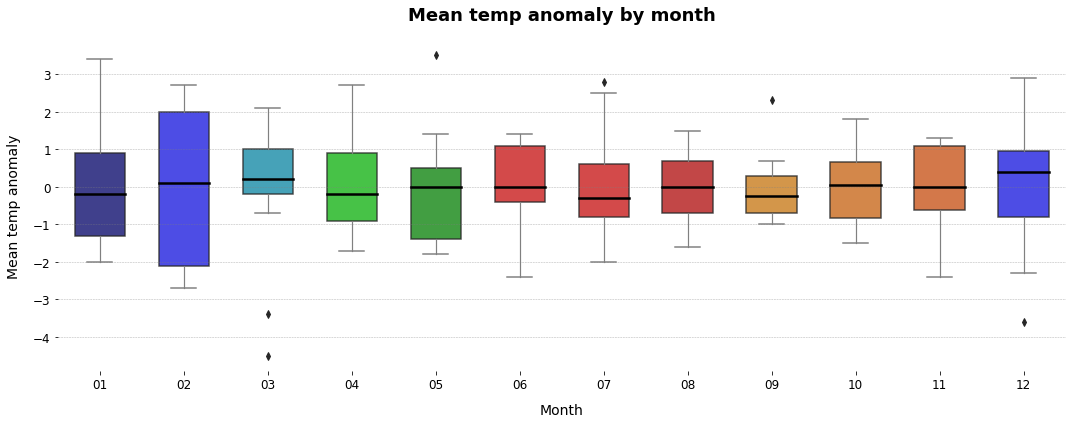

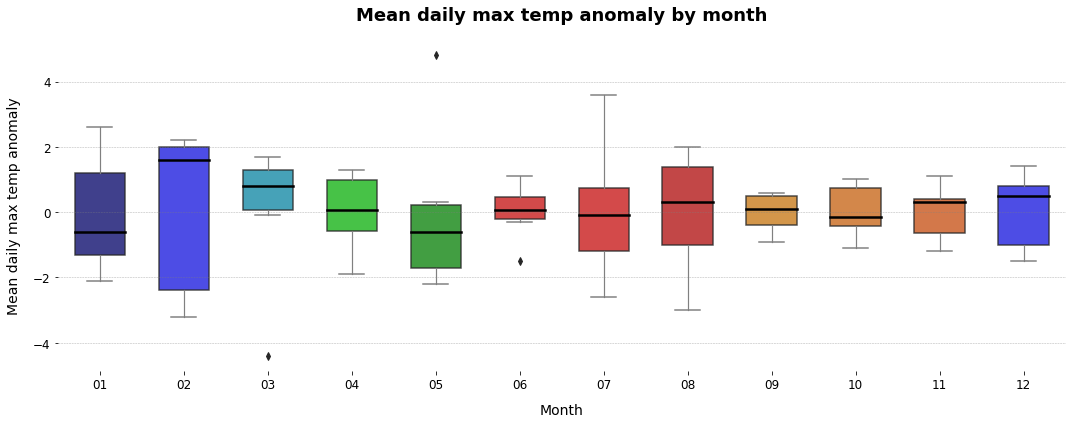

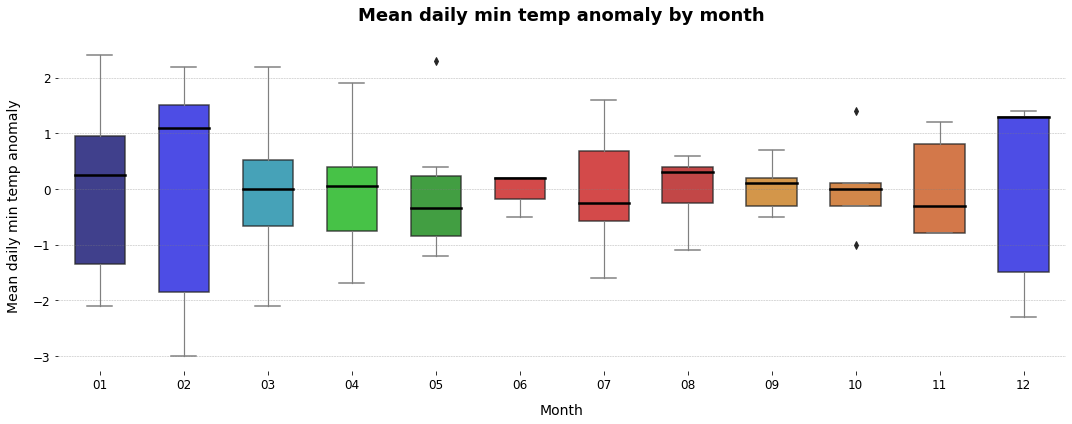

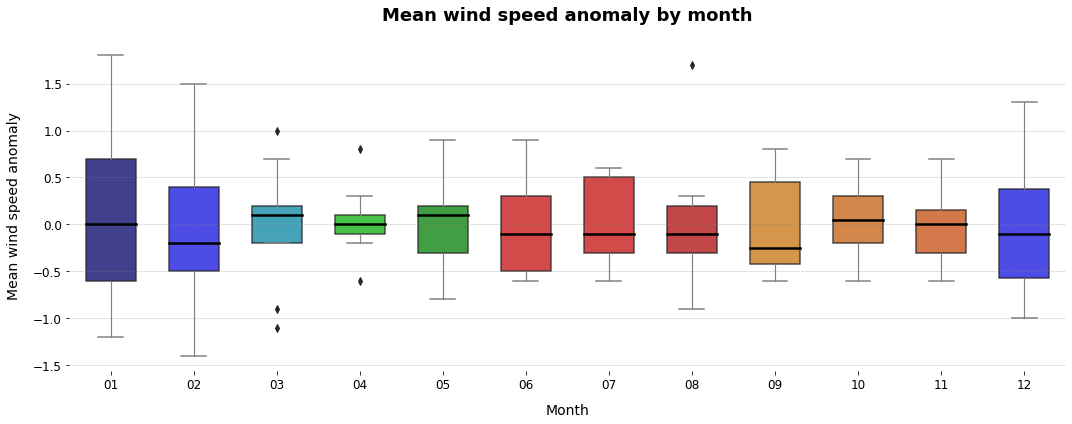

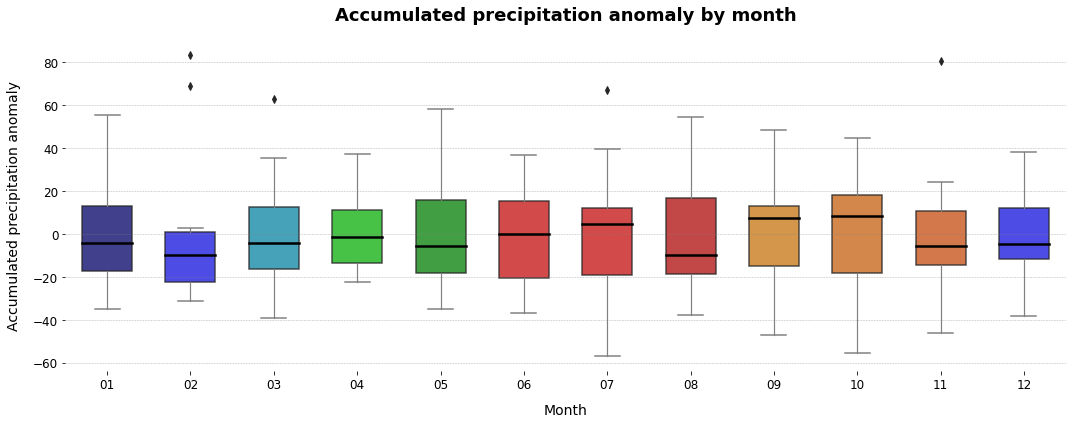

In [48]:
# Define colors for each month:
months_colors = {
    "01": (0, 0, 0.5, 1),     # Dark blue
    "02": (0, 0, 1, 1),   # Medium blue
    "03": (0, 0.6, 0.75, 1), # Light blue
    "04": (0, 0.8, 0, 1),    # Light green
    "05": (0, 0.6, 0, 1),    # Medium green
    "06": (0.9, 0, 0, 0),  # Transparent red
    "07": (0.9, 0, 0, 0),  # Transparent red
    "08": (0.8, 0, 0, 1),    # Medium red
    "09": (0.9, 0.5, 0, 1),  # Light orange
    "10": (0.9, 0.4, 0, 1),  # Medium orange
    "11": (0.9, 0.3, 0, 1),  # Dark orange
    "12": (0, 0, 1, 1)    # Darkest blue
}

for param in anomaly_parameters:
    plt.figure(figsize=(15, 6))
    
    # Boxplot for each anomaly parameter.
    sns.boxplot(data=df_combined_all_parameters, 
                x=df_combined_all_parameters['month'].str[-2:], 
                y=param, 
                palette=months_colors,
                width=0.6, 
                boxprops=dict(alpha=.8),
                medianprops=dict(color='black', linewidth=2.5),
                whiskerprops=dict(color='gray', linewidth=1.2),
                capprops=dict(color='gray'))
    
    # Titles and labels.
    plt.title(f'{param.capitalize()} by month', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=14, labelpad=12)
    plt.ylabel(param.capitalize(), fontsize=14, labelpad=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Grid and borders.
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
